Simulated Annealing
=======

# Theory

## Definition


## Examples


# Implementation


## Imports

In [185]:
import numpy as np
import pandas as pd
from sympy.abc import x
from typing import Callable
import matplotlib.pyplot as plt

In [186]:
# cost function
cost_func = lambda x : (x-4)**2                     # function to optimize
domain = [-2,3]                                     # expected search domain
x_0 = 2.5                                           # starting value search

# cooling schedule
cooling_func = lambda t : 1000*np.exp(-0.95*t)      # temperature decay function
cooling_window = [0,15]                             # cooling function domain

## Algorithm


In [188]:
def SA(cost_func: Callable, x_0: float, cooling_schedule: tuple[Callable, list], maxiter: int = int(1e3), task: str = "minimization") -> tuple[float, list, int]:
    '''
    _summary_

    Args:
        cost_func: _description_
        x_0: _description_
        cooling_schedule: _description_
        maxiter: _description_. Defaults to int(1e3).
        task: _description_. Defaults to "minimization".

    Returns:
        _description_
    '''
    
    # if task is "minimization"
    cooling_func, cooling_window = cooling_schedule


    # algorithm data
    T = cooling_func( np.linspace(*cooling_window, num=maxiter) )
    cost = [cost_func(x_0)]
    x = [x_0]

    for i in range(maxiter-1):
        
        x_neighbor = x[-1]+np.random.uniform(-1,1)
        delta_cost = cost_func(x_neighbor) - cost_func(x[-1])

        # accept better neighbor
        if delta_cost <= 0:
            x.append(x_neighbor)
            cost.append(cost_func(x_neighbor))

        # energy-driven accept probability for bad neighbor
        elif np.exp(-delta_cost/T[i]) > np.random.uniform(0,1):
            x.append(x_neighbor)
            cost.append(cost_func(x_neighbor))


    return cost, x, T

## Results Visualization & Basic Convergence Analysis


In [189]:
cost, x, t = SA(cost_func=cost_func, x_0=60, cooling_schedule=(cooling_func, cooling_window))

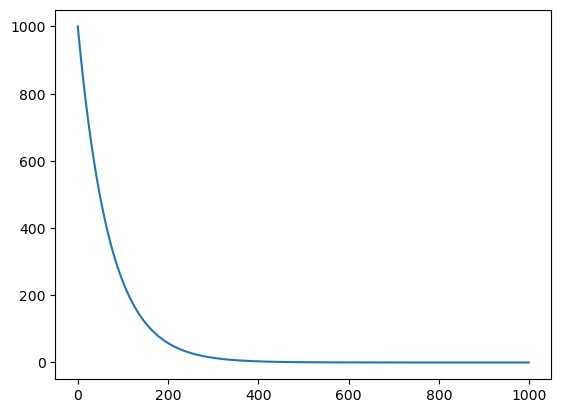

In [190]:
plt.plot(range(len(t)), t)

3.9852001470144813

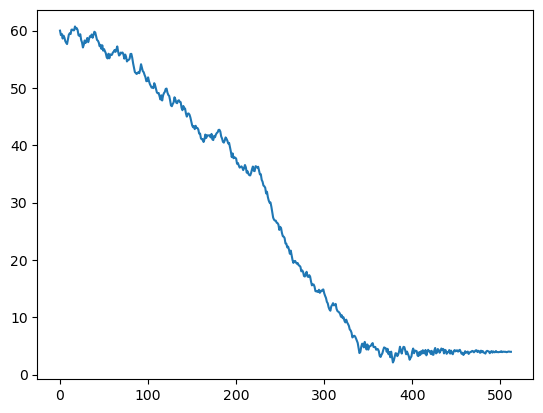

In [191]:
plt.plot(range(len(x)), x)
x[-1]

0.00021903564839296586

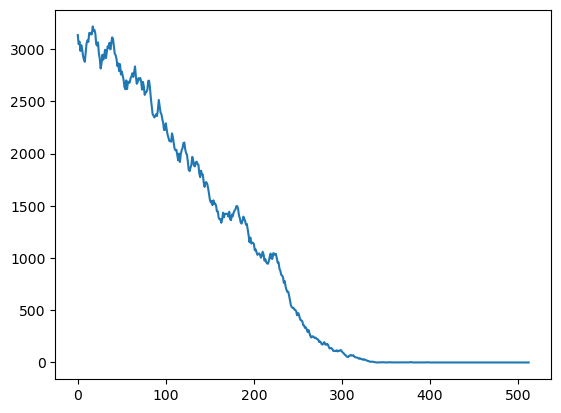

In [192]:
plt.plot(range(len(cost)), cost)
cost[-1]